# Pandas and MatPlotlib Example

In [ ]:
csv_path = "give_the_local_path_to_the_csv"

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(f"{csv_path}/yearly_rainfall.csv")

# Drop the unnamed index column if unnecessary
df.drop(columns=['Unnamed: 0'], inplace=True)

# Inspect data
print(df.head())



   year    bhopal    indore    mumbai     delhi     cochin
0  1901  2.714400  1.540437  8.320350  1.118002   8.187444
1  1902  2.807565  2.094117  6.955002  1.397658   9.598462
2  1903  3.085999  3.097124  7.868491  0.725256  10.089704
3  1904  2.211077  1.302007  5.966153  1.515815   7.257479
4  1905  2.456307  2.136186  4.557234  0.901843   6.658983


In [8]:
# Calculate total rainfall for each year
df['Total_Rainfall'] = df[['bhopal', 'indore', 'mumbai', 'delhi', 'cochin']].sum(axis=1)

# Identify years with max and min rainfall
max_year = df.loc[df['Total_Rainfall'].idxmax()]
min_year = df.loc[df['Total_Rainfall'].idxmin()]

print("Year with Maximum Rainfall:\n", max_year)
print("Year with Minimum Rainfall:\n", min_year)




Year with Maximum Rainfall:
 year              1961.000000
bhopal               4.905489
indore               4.027210
mumbai              10.909036
delhi                2.585234
cochin              10.976721
Total_Rainfall      33.403690
Name: 60, dtype: float64
Year with Minimum Rainfall:
 year              1918.000000
bhopal               2.352068
indore               1.192577
mumbai               3.386766
delhi                0.583926
cochin               7.188556
Total_Rainfall      14.703893
Name: 17, dtype: float64


In [10]:


# Mean rainfall for each city
city_means = df[['bhopal', 'indore', 'mumbai', 'delhi', 'cochin']].mean()
print("Average Rainfall by City:\n", city_means)



Average Rainfall by City:
 bhopal    3.284672
indore    2.626159
mumbai    7.909171
delhi     1.781188
cochin    8.551007
dtype: float64


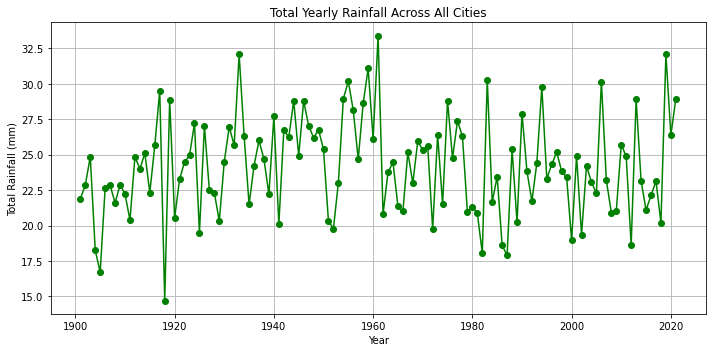

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(df['year'], df['Total_Rainfall'], marker='o', color='green')
plt.title("Total Yearly Rainfall Across All Cities")
plt.xlabel("Year")
plt.ylabel("Total Rainfall (mm)")
plt.grid(True)
plt.tight_layout()
plt.show()


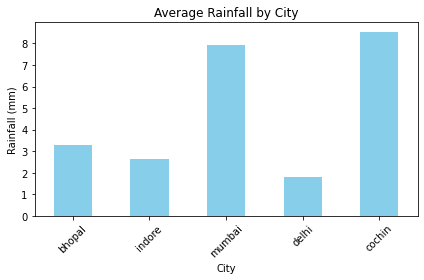

In [12]:
city_means.plot(kind='bar', color='skyblue')
plt.title("Average Rainfall by City")
plt.ylabel("Rainfall (mm)")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


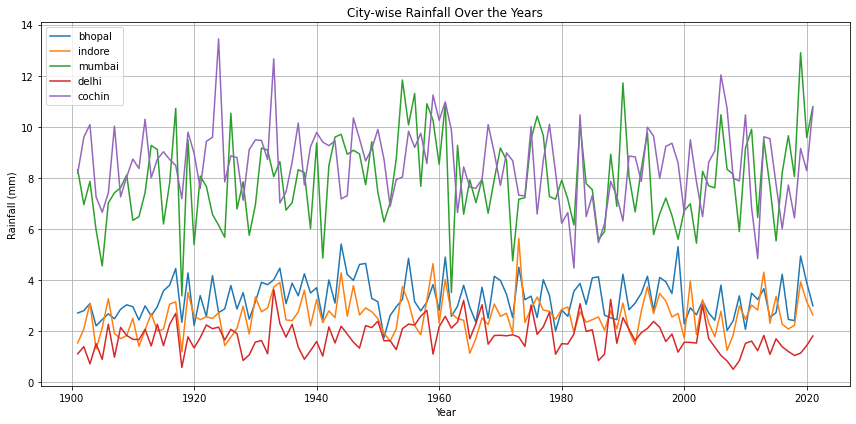

In [13]:
plt.figure(figsize=(12, 6))

for city in ['bhopal', 'indore', 'mumbai', 'delhi', 'cochin']:
    plt.plot(df['year'], df[city], label=city)

plt.title("City-wise Rainfall Over the Years")
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


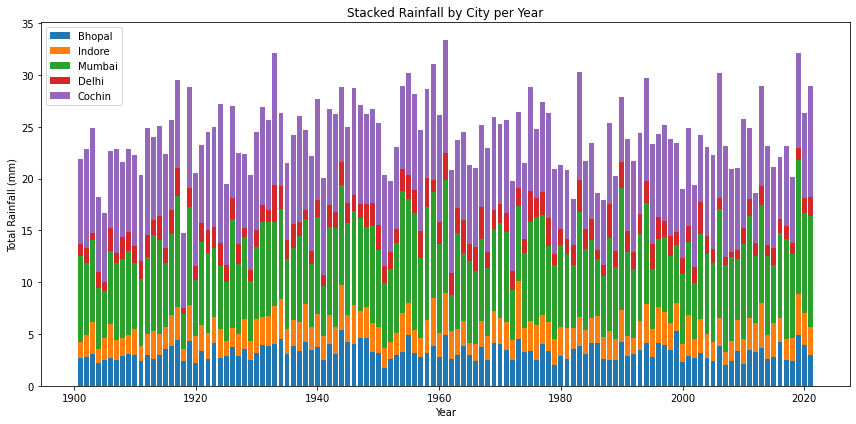

In [14]:
df_sorted = df.sort_values(by='year')
plt.figure(figsize=(12, 6))

plt.bar(df_sorted['year'], df_sorted['bhopal'], label='Bhopal')
plt.bar(df_sorted['year'], df_sorted['indore'], bottom=df_sorted['bhopal'], label='Indore')
plt.bar(df_sorted['year'], df_sorted['mumbai'], bottom=df_sorted['bhopal'] + df_sorted['indore'], label='Mumbai')
plt.bar(df_sorted['year'], df_sorted['delhi'], bottom=df_sorted['bhopal'] + df_sorted['indore'] + df_sorted['mumbai'], label='Delhi')
plt.bar(df_sorted['year'], df_sorted['cochin'], bottom=df_sorted['bhopal'] + df_sorted['indore'] + df_sorted['mumbai'] + df_sorted['delhi'], label='Cochin')

plt.title("Stacked Rainfall by City per Year")
plt.xlabel("Year")
plt.ylabel("Total Rainfall (mm)")
plt.legend()
plt.tight_layout()
plt.show()


<Figure size 576x432 with 0 Axes>

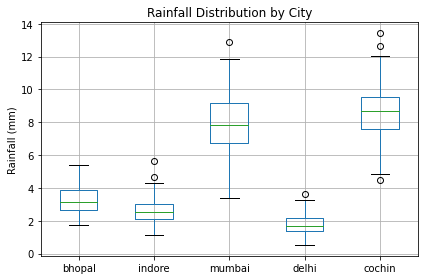

In [15]:
plt.figure(figsize=(8, 6))
df[['bhopal', 'indore', 'mumbai', 'delhi', 'cochin']].plot.box()
plt.title("Rainfall Distribution by City")
plt.ylabel("Rainfall (mm)")
plt.grid(True)
plt.tight_layout()
plt.show()


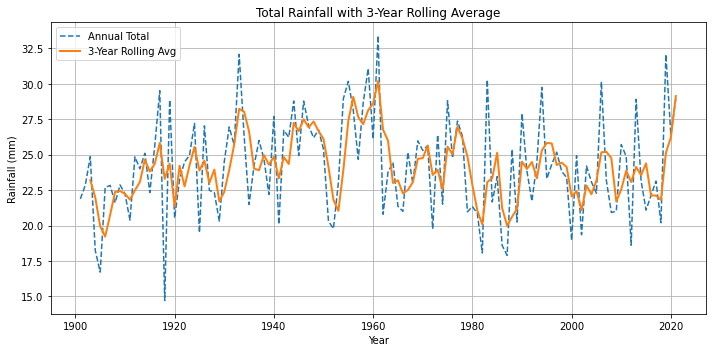

In [16]:
df['Rolling_Avg'] = df['Total_Rainfall'].rolling(window=3).mean()

plt.figure(figsize=(10, 5))
plt.plot(df['year'], df['Total_Rainfall'], label='Annual Total', linestyle='--')
plt.plot(df['year'], df['Rolling_Avg'], label='3-Year Rolling Avg', linewidth=2)
plt.title("Total Rainfall with 3-Year Rolling Average")
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


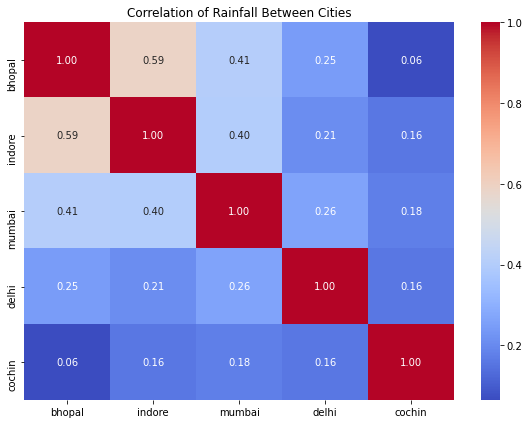

In [17]:
import seaborn as sns

correlation = df[['bhopal', 'indore', 'mumbai', 'delhi', 'cochin']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation of Rainfall Between Cities")
plt.tight_layout()
plt.show()


In [18]:
for city in ['bhopal', 'indore', 'mumbai', 'delhi', 'cochin']:
    driest = df.loc[df[city].idxmin()]
    print(f"Driest year in {city.title()}:")
    print(driest[['year', city]])
    print()


Driest year in Bhopal:
year      1951.000000
bhopal       1.752718
Name: 50, dtype: float64

Driest year in Indore:
year      1965.000000
indore       1.139731
Name: 64, dtype: float64

Driest year in Mumbai:
year      1918.000000
mumbai       3.386766
Name: 17, dtype: float64

Driest year in Delhi:
year     2008.000000
delhi       0.512589
Name: 107, dtype: float64

Driest year in Cochin:
year      1982.000000
cochin       4.474945
Name: 81, dtype: float64

